# Project 3: Web APIs and NLP <br>

#### Brandie Hatch

### Exploratory Data Analysis, Cleaning, and Feature Engineering

## Problem



Learn with Chewie presents:
Web API and NLP Services

What do the users of Reddit consider dog CARE vs. dog TRAINING?

__Data Dictionary__

Features used listed below:
| **Feature**      | **Type** | **Dataset** | **Description**                                           |
|------------------|----------|-------------|-----------------------------------------------------------|
| **subreddit**    | _object_ | df          | Subreddit Name (instance of Subreddit)                    |
| **title**        | _object_ | df          | Title of submission                                       |
| **selftext**     | _object_ | df          | Selftext of a submission (an empty string if a link post) |
| **author**       | _object_ | df          | Author (Redditor) of the submission                       |
| **name**         | _object_ | df          | Full ID of submission, prefixed with t4_                  |
| **ups**          | _int64_  | df          | Number of up-vote points for a submission                 |
| **downs**        | _int64_  | df          | Number of down-vote points for a submission               |
| **score**        | _int64_  | df          | Total points for a submission                             |
| **num_comments** | _int64_  | df          | Number of comments on the submission                      |

Created with: https://www.tablesgenerator.com/markdown_tables#                                                             

## Imports, Reading in Data, and Cleaning Data

Cleaning data will be in response to some basic EDA to create a single DataFrame that can be used for more detailed EDA to determine modeling.

In [248]:
# python library imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

%matplotlib inline
pd.options.display.max_columns =999

from sklearn.feature_extraction.text import CountVectorizer


In [213]:
# load data

dogtraining = pd.read_csv('../data/dogtraining.csv')
print(dogtraining.shape)
dogtraining.head()

(5400, 12)


,subreddit,id,title,selftext,author,name,ups,downs,score,num_comments,created_utc,over_18
0,Dogtraining,uijir1,Trick of the Month - May 2022 - Crawl Backwards,Welcome to the Trick of the Month!\n\nThis mon...,moo6,t3_uijir1,8,0,8,4,2022-05-04T16:25:25Z,False
1,Dogtraining,ujxbsz,Announcement - Puppy Enrichment AMA With Allie...,NaN,Cursethewind,t3_ujxbsz,7,0,7,2,2022-05-06T14:05:34Z,False
2,Dogtraining,up52vw,How do I get a cafe/brewery dog?,I am sitting at a brewery right now and all th...,slothsandwhich,t3_up52vw,311,0,311,88,2022-05-13T17:11:13Z,False
3,Dogtraining,upd3e8,"Hi, does anybody know the company that makes t...",NaN,Fluffy_Overlord_1995,t3_upd3e8,59,0,59,6,2022-05-14T01:47:21Z,False
4,Dogtraining,upgv84,Warning: Gross,I noticed my dog trying to eat the poop of oth...,oxabexo,t3_upgv84,19,0,19,40,2022-05-14T06:05:24Z,False


The Dog Training data set includes 5400 observations of twelve variables. I chose to add extra observations because the selftext column has 800 null values that I think need to be dropped (each row with null will be removed).

In [214]:
dogtraining.isnull().sum()

subreddit         0
id                0
title             0
selftext        800
author            0
name              0
ups               0
downs             0
score             0
num_comments      0
created_utc       0
over_18           0
dtype: int64

In [215]:
# general statistics to see what the numeric data looks like 
# will remove downs because there are no vote downs in the data collected, so there is no reason to keep it (for space saving reasons)
dogtraining.describe()

,ups,downs,score,num_comments
count,5400.000000,5400.0,5400.000000,5400.000000
mean,39.948519,0.0,39.948519,15.046481
std,99.368998,0.0,99.368998,34.532518
min,0.000000,0.0,0.000000,0.000000
25%,1.000000,0.0,1.000000,2.000000
50%,3.000000,0.0,3.000000,4.000000
75%,16.000000,0.0,16.000000,9.000000
max,433.000000,0.0,433.000000,167.000000


In [216]:
# dtypes for Data Dictionary above
dogtraining.dtypes

subreddit       object
id              object
title           object
selftext        object
author          object
name            object
ups              int64
downs            int64
score            int64
num_comments     int64
created_utc     object
over_18           bool
dtype: object

In [217]:
# read in data
dogcare = pd.read_csv('../data/dogcare.csv')
print(dogcare.shape)
dogcare.head()

(8750, 12)


,subreddit,id,title,selftext,author,name,ups,downs,score,num_comments,created_utc,over_18
0,DogCare,upgugb,Massages for hip dysplasia?,"He's a 6 yo boxer/mastiff,135 lbs and in good ...",Flaky_Watch,t3_upgugb,5,0,5,1,2022-05-14T06:04:21Z,False
1,DogCare,uow11b,"My dog has this weird thing on the tail, can a...",NaN,NivTheGever,t3_uow11b,24,0,24,15,2022-05-13T09:50:09Z,False
2,DogCare,upa4qd,Lab/Great Dane puppy leg shattered,So my dog jumped out of my truck and completel...,Boomstick825,t3_upa4qd,1,0,1,4,2022-05-13T22:14:14Z,False
3,DogCare,up7lse,Any ideas what this might be?,I came home from work a couple of days ago and...,ChunkyMonkey3499,t3_up7lse,0,0,0,1,2022-05-13T19:35:38Z,False
4,DogCare,uoyffw,Anyone know what this could be? 7 Yr old Irish...,NaN,Disastrous_Bobcat402,t3_uoyffw,1,0,1,0,2022-05-13T11:44:38Z,False


The Dog Care data set includes 8750 observations of twelve variables. I chose to add extra observations because the selftext column has 3850 null values that I think need to be dropped (each row with null will be removed).

In [218]:
dogcare.isnull().sum()

subreddit          0
id                 0
title              0
selftext        3850
author             0
name               0
ups                0
downs              0
score              0
num_comments       0
created_utc        0
over_18            0
dtype: int64

In [219]:
# dtypes for Data Dictionary above
dogtraining.dtypes

subreddit       object
id              object
title           object
selftext        object
author          object
name            object
ups              int64
downs            int64
score            int64
num_comments     int64
created_utc     object
over_18           bool
dtype: object

In [220]:
# general statistics to see what the numeric data looks like 
# will remove downs because there are no vote downs in the data collected, so there is no reason to keep it (for space saving reasons)
dogcare.describe()

,ups,downs,score,num_comments
count,8750.000000,8750.0,8750.000000,8750.000000
mean,6.834057,0.0,6.834057,8.120000
std,7.188870,0.0,7.188870,9.408279
min,0.000000,0.0,0.000000,0.000000
25%,3.000000,0.0,3.000000,3.000000
50%,5.000000,0.0,5.000000,4.000000
75%,7.000000,0.0,7.000000,10.000000
max,26.000000,0.0,26.000000,42.000000


In [221]:
# join the two DataFrames
df = pd.concat([dogtraining, dogcare], axis=0, ignore_index=True)

In [222]:
# remove rows with selftext nulls/NaN
df = df.dropna(axis=0)

In [223]:
# remove rows that have over_18 = True (these are likely NSFW submissions)
df = df[(df['over_18'] == False)]

In [224]:
# verifying that with the removal of rows and columns, the split between the two subreddits is approximately 50/50 (or at least really close)
df['subreddit'].value_counts(normalize=True)

Dogtraining    0.502732
DogCare        0.497268
Name: subreddit, dtype: float64

In [225]:
# remove columns that will not be needed for next steps
df = df.drop(columns=['id', 'author', 'name', 'downs', 'created_utc', 'over_18'])

In [226]:
# resetting index after all of the cleanup
df = df.reset_index(drop=True)

In [227]:
print(df.shape)
df.head()

(9150, 6)


,subreddit,title,selftext,ups,score,num_comments
0,Dogtraining,Trick of the Month - May 2022 - Crawl Backwards,Welcome to the Trick of the Month!\n\nThis mon...,8,8,4
1,Dogtraining,How do I get a cafe/brewery dog?,I am sitting at a brewery right now and all th...,311,311,88
2,Dogtraining,Warning: Gross,I noticed my dog trying to eat the poop of oth...,19,19,40
3,Dogtraining,My 3 months samoyed forgot all his training af...,"As the title says, after having stomach issues...",28,28,18
4,Dogtraining,Two mat questions!,Hi! I have a dog bed in the living room and I’...,6,6,0


In [228]:
df.to_csv('../data/raw.csv')

## Explore Data

In [229]:
# look at ups, downs, num_comments in comparison to the subreddit


### Lengths of Titles and Selftext descriptions

Determining if length of Titles and Selftext descriptions is worth more review by creating new columns with lengths to analyze.

In [230]:
# create a new column called title_length that contains the length of each title

df['title_length'] = df['title'].transform(len)


In [231]:
# create a new column called title_word_count that contains the number of words in each title

df['title_word_count'] = df['title'].map(lambda x: len(x.split(' ')))

In [232]:
# create a new column called selftext_length that contains the length of each selftext

df['selftext_length'] = df['selftext'].transform(len)

In [233]:
# create a new column called selftext_word_count that contains the number of words in each selftext

df['selftext_word_count'] = df['selftext'].map(lambda x: len(x.split(' ')))

### Longest and shortest Titles and Selftext descriptions

Determining if it is worth more review by looking at the five longest and five shortest Titles and Selftext description word counts.

In [234]:
df.sort_values(by='title_word_count')['title'].head(5)

2509    Warning: Gross
3577        Potty Help
3567    Warning: Gross
840         Potty Help
3554        Potty Help
Name: title, dtype: object

In [235]:
df.sort_values(by='selftext_word_count')['selftext'].head(5)

6847    Edit: Resolved thank you
7679    Edit: Resolved thank you
4988    Edit: Resolved thank you
6015    Edit: Resolved thank you
7666    Edit: Resolved thank you
Name: selftext, dtype: object

In [236]:
df.sort_values(by='title_word_count', ascending=False)['title'].head(5)

5443    I have an 19lb dog and a 50lb dog. I know the ...
8784    I have an 19lb dog and a 50lb dog. I know the ...
7120    I have an 19lb dog and a 50lb dog. I know the ...
8277    I have an 19lb dog and a 50lb dog. I know the ...
5248    I have an 19lb dog and a 50lb dog. I know the ...
Name: title, dtype: object

In [237]:
df.sort_values(by='selftext_word_count', ascending=False)['selftext'].head(5)

1628     This is a long one, I'm looking for advice on...
4319     This is a long one, I'm looking for advice on...
961      This is a long one, I'm looking for advice on...
2847     This is a long one, I'm looking for advice on...
4204     This is a long one, I'm looking for advice on...
Name: selftext, dtype: object

### Distribution of lengths of Titles and Selftext descriptions

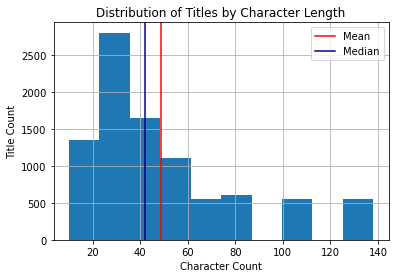

In [238]:
df['title_length'].hist()
plt.title('Distribution of Titles by Character Length')
plt.xlabel('Character Count')
plt.ylabel('Title Count')
plt.axvline(df.title_length.mean(), color='red')
plt.axvline(df.title_length.median(), color='darkblue')
plt.legend(['Mean','Median']);

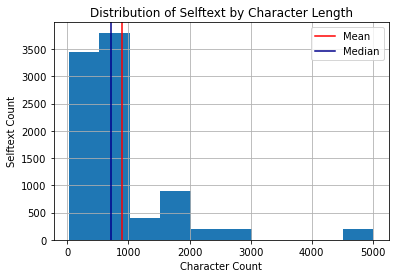

In [239]:
df['selftext_length'].hist()
plt.title('Distribution of Selftext by Character Length')
plt.xlabel('Character Count')
plt.ylabel('Selftext Count')
plt.axvline(df.selftext_length.mean(), color='red')
plt.axvline(df.selftext_length.median(), color='darkblue')
plt.legend(['Mean','Median']);

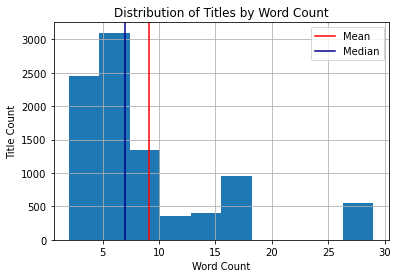

In [240]:
df['title_word_count'].hist()
plt.title('Distribution of Titles by Word Count')
plt.xlabel('Word Count')
plt.ylabel('Title Count')
plt.axvline(df.title_word_count.mean(), color='red')
plt.axvline(df.title_word_count.median(), color='darkblue')
plt.legend(['Mean','Median']);

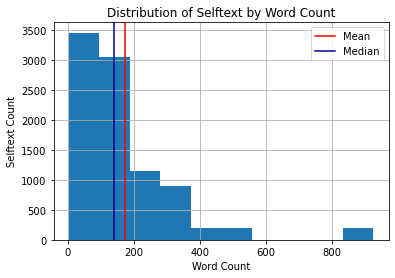

In [207]:
df['selftext_word_count'].hist()
plt.title('Distribution of Selftext by Word Count')
plt.xlabel('Word Count')
plt.ylabel('Selftext Count')
plt.axvline(df.selftext_word_count.mean(), color='red')
plt.axvline(df.selftext_word_count.median(), color='darkblue')
plt.legend(['Mean','Median']);

__EDA Conclusion 1:__ From the above plots and longest/shortest reviews, I don't believe that using the character or word counts for the titles or selftext will provide much distinction between Dog Care vs. Training. 

I'm considering other ways to look at that....

In [241]:
# subreddit mapping
df['subreddit'] = df['subreddit'].map({'DogCare': 0, 'Dogtraining': 1})

In [242]:
df.head()

,subreddit,title,selftext,ups,score,num_comments,title_length,title_word_count,selftext_length,selftext_word_count
0,1,Trick of the Month - May 2022 - Crawl Backwards,Welcome to the Trick of the Month!\n\nThis mon...,8,8,4,47,10,856,140
1,1,How do I get a cafe/brewery dog?,I am sitting at a brewery right now and all th...,311,311,88,32,7,337,67
2,1,Warning: Gross,I noticed my dog trying to eat the poop of oth...,19,19,40,14,2,249,49
3,1,My 3 months samoyed forgot all his training af...,"As the title says, after having stomach issues...",28,28,18,71,14,680,138
4,1,Two mat questions!,Hi! I have a dog bed in the living room and I’...,6,6,0,18,3,797,157


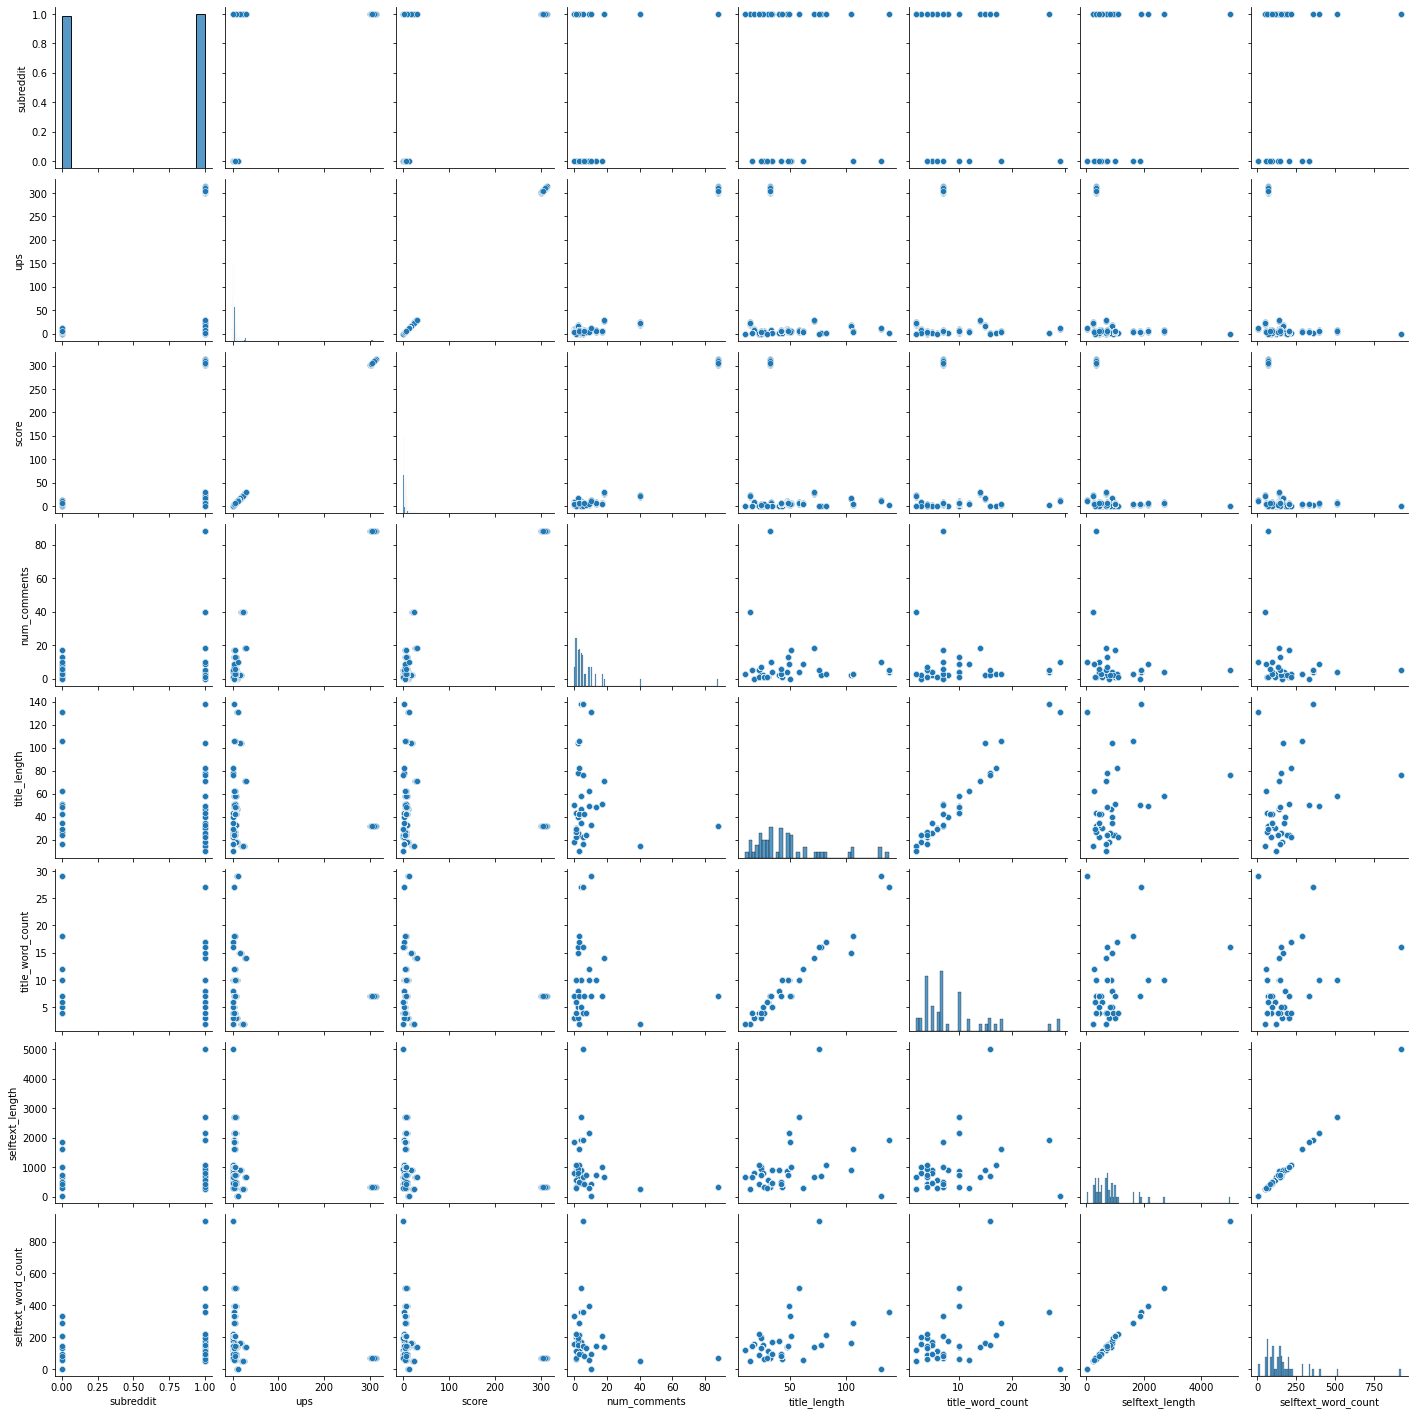

In [243]:
sns.pairplot(df);

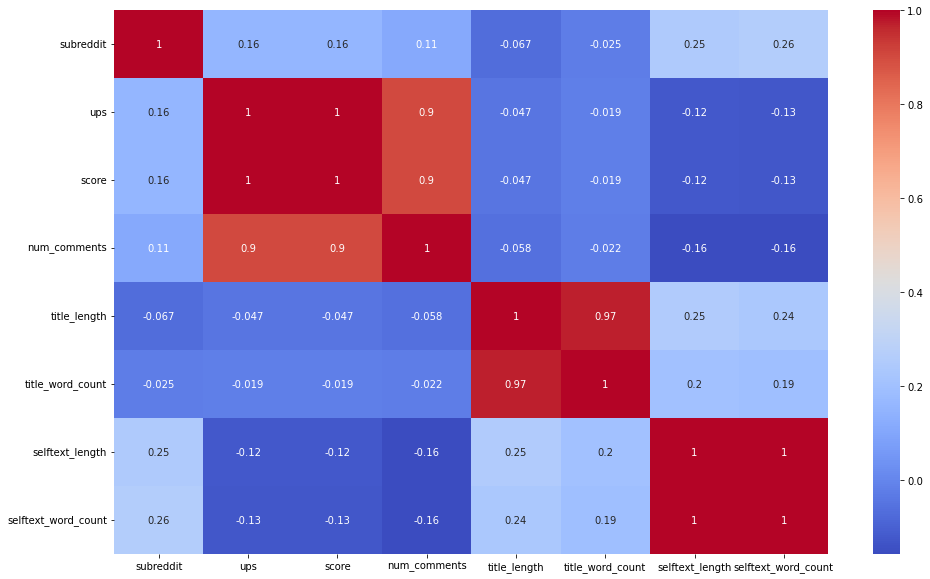

In [246]:
plt.figure(figsize=(16, 10))
sns.heatmap(
    df.corr(),
    annot=True,
    cmap='coolwarm'
    );

In [247]:
df.corr()

,subreddit,ups,score,num_comments,title_length,title_word_count,selftext_length,selftext_word_count
subreddit,1.000000,0.155577,0.155577,0.114251,-0.066528,-0.024599,0.249628,0.260717
ups,0.155577,1.000000,1.000000,0.903393,-0.046851,-0.019202,-0.121674,-0.125403
score,0.155577,1.000000,1.000000,0.903393,-0.046851,-0.019202,-0.121674,-0.125403
num_comments,0.114251,0.903393,0.903393,1.000000,-0.058047,-0.021797,-0.156476,-0.156765
title_length,-0.066528,-0.046851,-0.046851,-0.058047,1.000000,0.970403,0.251512,0.236115
title_word_count,-0.024599,-0.019202,-0.019202,-0.021797,0.970403,1.000000,0.204558,0.192068
selftext_length,0.249628,-0.121674,-0.121674,-0.156476,0.251512,0.204558,1.000000,0.998210
selftext_word_count,0.260717,-0.125403,-0.125403,-0.156765,0.236115,0.192068,0.998210,1.000000


__EDA Conclusion 2:__ Interesting correlations in the heatmap that show strong relationships between number of comments and ups/scores. But, after talking with Devin about how the data gets saved from Reddit, it might not be smart to spend time working with the num_comments, ups, or scores since they may be outdated. 

## EDA on Word Counts

Utilizing CountVectorizer to count_vectorize the text in title and selftext columns. This converts text data into a structured, numeric dataframe where the *count* is how many times a token is observed, whereas the *vectorizer* is the column that stores those counts. 

In [267]:
cvex = CountVectorizer(stop_words='english')

In [269]:
# title 
c_title = cvex.fit_transform(df['title'])
c_title
c_title = pd.DataFrame(c_title.todense(), columns=cvex.get_feature_names_out())
c_title

,13,19lb,2022,22lbs,50lb,55lbs,act,adjusting,advanced,advice,amp,anal,answer,attacking,backwards,barking,bed,bell,best,bite,boxer,breed,brewery,cafe,camping,cat,cats,cause,chewing,chiahuahuas,concern,concerned,considering,crawl,cuddling,cut,dane,dasuquin,days,difficulty,discharge,doesn,dog,dogs,dysplasia,eating,eats,enjoying,enrichment,exercise,family,fix,flea,foaming,forgot,garden,german,gets,giant,gland,great,greyhounds,gross,guarding,gum,hand,handle,having,heelwork,help,hip,holding,house,husky,ideas,independence,inside,inu,involve,jumping,know,lab,leaving,leg,ll,looking,lot,massages,mat,meds,month,months,msm,neighbours,new,normal,obsessed,occasionally,old,owner,pant,paw,petting,pink,poop,potty,pup,puppy,puzzle,questions,quick,rally,reactive,read,really,resource,run,samoyed,say,seemingly,shattered,shepherd,shiba,shitzu,sick,small,solo,solution,stand,started,starting,starve,stop,stuck,subreddit,suggestions,swim,teach,temperature,time,toy,training,treats,trick,tries,try,tunnel,turn,use,vision,vs,walk,warning,way,wife,year
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9145,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9146,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9147,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0

In [270]:
# selftext
c_selftext = cvex.fit_transform(df['selftext'])
c_selftext
c_selftext = pd.DataFrame(c_selftext.todense(), columns=cvex.get_feature_names_out())
c_selftext

,05,06,10,12,135,15,17kg,18,20,20ft,22,24,25,2yo,30,45,9wks,able,absolutely,abused,accidentally,accidents,acclimating,accompanied,accounts,acre,act,acting,active,actively,activities,activity,acts,actual,actually,added,additional,adopted,adopting,adorable,advance,advanced,advantage,advice,advised,affectionate,afford,age,ages,aggression,aggressive,aggressively,agility,ago,ahold,aid,alert,allergies,allowed,amazing,amounts,amp,anal,angel,angry,animal,animals,anxiety,anxious,anybody,apart,apologies,appears,appointment,appreciated,approaches,area,aren,arthritis,asking,aspect,associated,association,assuming,attack,attacked,attacking,attacks,attempt,attention,average,avoid,away,baby,backstory,backwards,backyard,bad,bags,ball,bark,barking,barks,based,basic,basically,bath,bathroom,bc,beach,beagle,beautifully,bed,bedroom,beginning,behavior,behaviors,behaviour,belgium,believe,bell,bernard,best,better,big,biking,bit,bite,bites,biting,bitten,bitting,bizarre,black,blanket,blood,bones,boot,booties,boss,bowel,bowl,boxer,boyfriend,brace,brag,brain,brainstorming,breed,breeds,breweries,brewery,bringing,broken,brown,bug,building,built,bunny,busy,butt,buy,buying,cafe,cafes,calls,calm,calmness,calms,came,camp,camping,campsite,canada,cannto,car,care,caring,carry,case,cat,catahoula,cats,causing,ceiling,celsius,cementing,center,certain,challenges,change,changing,chases,cheaper,check,checkup,checkups,chew,chewer,chewing,chewy,chihuahua,city,classes,clean,clear,click,clinic,close,closely,closing,clump,coat,cockierspaniel,cold,collar,college,color,com,combine,come,comes,comfort,comfortable,coming,command,commands,comment,comments,communities,complaint,completely,concept,concerned,concerning,confirm,confuse,confused,consistency,consistently,console,constant,constantly,contact,continue,continues,corgi,corner,correct,corrections,costs,couch,couple,course,covid,crate,crated,crawl,crazy,create,creating,cries,cruel,crusted,cuddle,cumbersome,currently,curtains,cut,daily,damage,dane,dark,dasuquin,day,daycare,daycares,days,deal,dealt,december,decide,decided,decides,deer,deficient,definitely,deliveries,described,desperate,desperately,deterrent,did,didn,diet,direction,directly,dirt,disservice,distance,distract,dives,doberman,docile,does,doesn,dog,doggy,dogs,doing,don,dont,door,downstairs,dr,driving,duration,duty,eachother,early,easily,eat,eaten,eating,eats,edit,efficiently,embarrassed,emphasize,end,ends,energy,enforce,enforced,engage,enjoy,enjoying,enrichment,environment,equation,escape,especially,essentially,establishing,estimated,evening,event,events,eventually,exact,excitable,excited,excitement,exercise,exercising,exit,expect,experience,experienced,extensive,extra,eye,eyes,facing,fact,factors,fades,fail,fairly,family,faq,far,faster,favourite,fear,featured,feedback,feeder,feel,feeling,female,fence,fetch,figure,film,finding,finds,fine,fit,fixated,flea,flex,floor,fluid,foaming,focus,focused,food,footballs,forgive,form,frankly,free,freeze,friend,friendly,friends,frozen,fully,fun,fur,future,galley,garden,gardens,generalize,generally,gentle,german,gets,getting,giant,given,gland,glass,goes,going,gone,gonna,good,got,gotten,grabbed,grabs,grass,great,greatly,greet,greeting,grew,greyhound,grind,groomed,ground,growing,growl,growls,grown,grumpy,guarding,guilt,gum,guy,habit,hallway,hand,handle,hang,hanging,happen,happened,happening,happens,happily,happy,hard,harness,hasn,hates,having,head,heads,healthy,hear,heart,heartworm,heat,heavily,heavy,heel,heeling,heelwork,hello,help,helpful,helping,helpless,hesitant,hey,hi,high,hikes,hiking,hiss,hissed,hisses,hobbies,hollow,home,...,particulalry,particular,partner,pass,passenger,passing,past,pat,paws,pay,paying,pee,peed,pei,pen,pending,people,performing,periods,pet,pets,petting,phase,photo,pick,picked,picture,pictures,piece,pieces,pink,pinning,pins,pinscher,pitbull,place,placement,plan,planned,planning,play,playing,plays,plenty,plus,point,pooch,poodle,poop,pooped,pooping,portable,position,positive,possible,post,postman,potty,power,prai

### The 15 most common words

Will show common words for both Title and Selftext. Removing stopwords because the original set of 15 were primarily stop words. 

In [265]:
# title: 15 common words
c_title.sum().sort_values(ascending=False).head(15)

dog        3950
new        1100
help        750
owner       700
old         550
puppy       550
having      550
year        550
dogs        550
time        400
19lb        350
leg         350
lab         350
foaming     350
know        350
dtype: int64

In [271]:
# selftext: 15 common words
c_selftext.sum().sort_values(ascending=False).head(15)

dog         14600
just         8900
dogs         6550
zola         6200
old          5850
like         5200
time         4450
want         4050
year         4050
don          4000
puppy        3950
training     3950
vet          3900
does         3850
sure         3500
dtype: int64

### Frequency of the 15 most common words as bar chart


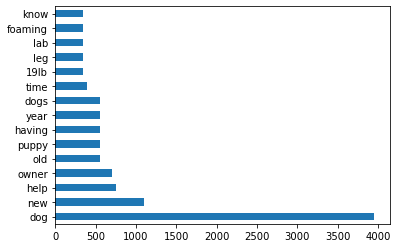

In [266]:
# title: frequency bar chart
c_title.sum().sort_values(ascending=False).head(15).plot(kind='barh');

<AxesSubplot:>

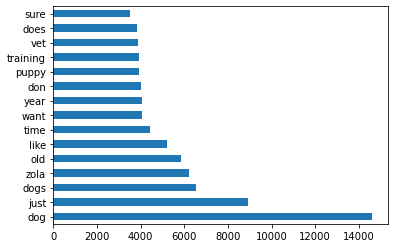

In [272]:
# selftext: frequency bar chart
c_selftext.sum().sort_values(ascending=False).head(15).plot(kind='barh');

In [276]:
# investigating 'don'
# [selftext for selftext in df['selftext'] if 'don' in selftext.lower()][:10]
# viewed the top ten for the word 'don', but I think it is pulling into the most frequently used because of the contraction "don't"

### Most common words based on ??? Subreddit? 

**Start here**

In [288]:
title_and_subreddit = pd.concat([c_title, df['subreddit']], axis=1)

In [289]:
title_and_subreddit.head()

,13,19lb,2022,22lbs,50lb,55lbs,act,adjusting,advanced,advice,amp,anal,answer,attacking,backwards,barking,bed,bell,best,bite,boxer,breed,brewery,cafe,camping,cat,cats,cause,chewing,chiahuahuas,concern,concerned,considering,crawl,cuddling,cut,dane,dasuquin,days,difficulty,discharge,doesn,dog,dogs,dysplasia,eating,eats,enjoying,enrichment,exercise,family,fix,flea,foaming,forgot,garden,german,gets,giant,gland,great,greyhounds,gross,guarding,gum,hand,handle,having,heelwork,help,hip,holding,house,husky,ideas,independence,inside,inu,involve,jumping,know,lab,leaving,leg,ll,looking,lot,massages,mat,meds,month,months,msm,neighbours,new,normal,obsessed,occasionally,old,owner,pant,paw,petting,pink,poop,potty,pup,puppy,puzzle,questions,quick,rally,reactive,read,really,resource,run,samoyed,say,seemingly,shattered,shepherd,shiba,shitzu,sick,small,solo,solution,stand,started,starting,starve,stop,stuck,subreddit,suggestions,swim,teach,temperature,time,toy,training,treats,trick,tries,try,tunnel,turn,use,vision,vs,walk,warning,way,wife,year,subreddit
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [290]:
# title 
title_and_subreddit = cvex.fit_transform(df['title'])
title_and_subreddit
title_and_subreddit = pd.DataFrame(title_and_subreddit.todense(), columns=cvex.get_feature_names_out())
title_and_subreddit

,13,19lb,2022,22lbs,50lb,55lbs,act,adjusting,advanced,advice,amp,anal,answer,attacking,backwards,barking,bed,bell,best,bite,boxer,breed,brewery,cafe,camping,cat,cats,cause,chewing,chiahuahuas,concern,concerned,considering,crawl,cuddling,cut,dane,dasuquin,days,difficulty,discharge,doesn,dog,dogs,dysplasia,eating,eats,enjoying,enrichment,exercise,family,fix,flea,foaming,forgot,garden,german,gets,giant,gland,great,greyhounds,gross,guarding,gum,hand,handle,having,heelwork,help,hip,holding,house,husky,ideas,independence,inside,inu,involve,jumping,know,lab,leaving,leg,ll,looking,lot,massages,mat,meds,month,months,msm,neighbours,new,normal,obsessed,occasionally,old,owner,pant,paw,petting,pink,poop,potty,pup,puppy,puzzle,questions,quick,rally,reactive,read,really,resource,run,samoyed,say,seemingly,shattered,shepherd,shiba,shitzu,sick,small,solo,solution,stand,started,starting,starve,stop,stuck,subreddit,suggestions,swim,teach,temperature,time,toy,training,treats,trick,tries,try,tunnel,turn,use,vision,vs,walk,warning,way,wife,year
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9145,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9146,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9147,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0

In [292]:
title_and_subreddit[title_and_subreddit['subreddit'] == 1].sum().sort_values(ascending=False).head(25)

subreddit      200
really         200
read           200
rally          200
enjoying       200
considering    200
starting       200
heelwork       200
potty            0
paw              0
petting          0
pink             0
poop             0
13               0
pup              0
puppy            0
pant             0
questions        0
quick            0
reactive         0
puzzle           0
owner            0
run              0
meds             0
leaving          0
dtype: int64

### EDA Conclusions and Notes

In [244]:
# BASELINE
df['subreddit'].mean()

0.5027322404371585